In [1]:
df = read.csv('books.csv')

In [2]:
#Loading packages
library(stringr)    #Strings operations
library(data.table) #Transposing dataframe
library(ggplot2)    #Visualisation
library(dplyr)      #Dataframe operations
library(caret)      #Models
library(quanteda)   #Tokenizing text into words
library(rpart)      #Decision Tree
library(janitor)    #Validating colnames of dataframe
library(partykit)   #Visualizing Decision Tree

Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'quanteda' was built under R version 3.6.3"Package version: 2.0.1
Parallel computing: 2 of 8 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: 'quanteda'

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    

In [3]:
df$average_rating <- as.numeric(levels(df$average_rating))[df$average_rating]
colnames(df)[8] <- 'Num_pages'
df$Num_pages <- as.numeric(levels(df$Num_pages))[df$Num_pages]
df$title <- as.character(levels(df$title))[df$title]

#Ensuring that num_page is above 0
colnames(df)[8] <- 'Num_pages'
df <- filter(df, df$Num_pages>0)

# 4 records have a value 'NOT A BOOK' in a feature author, so we'll set it to NA
which(df$authors=='NOT A BOOK')
df$authors <- as.character(df$authors)
df <- dplyr:::filter(df, df$authors!='NOT A BOOK')

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] 5443 5444 5445

In [4]:

#Ensuring that 'average_rating' consist of digits
df<- dplyr:::filter(df, str_detect(df$average_rating, '^[0-9].*[0-9]$'))

In [5]:

#Lastly, let's see how many NA's there are; and delete them
sapply(df, function(x) length(which(is.na(x))))
df <- na.omit(df)

bookID              title            authors     average_rating 
                 0                  0                  0                  0 
              isbn             isbn13      language_code          Num_pages 
                 0                  0                  0                  0 
     ratings_count text_reviews_count   publication_date          publisher 
                 0                  0                  0                  0

In [6]:
  df %>%
 select(title, 
        authors, 
        average_rating, 
        language_code, 
        Num_pages, 
        ratings_count, 
        text_reviews_count, 
        publication_date, 
        publisher) %>%
 filter(grepl('J.',authors),
        grepl('Harry',title),
        publication_date >= as.Date("05-01-1995"),
        grepl('Schol',publisher),
        language_code == 'eng')

Warning message in ~publication_date >= as.Date("05-01-1995"):
"Incompatible methods ("Ops.factor", ">=.Date") for ">=""

title,authors,average_rating,language_code,Num_pages,ratings_count,text_reviews_count,publication_date,publisher
Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPrÃ©,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPrÃ©,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPrÃ©,4.78,eng,2690,41428,164,9/13/2004,Scholastic
Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling/Mary GrandPrÃ©,4.42,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.


In [7]:

d <- df %>%
  group_by(authors) %>%
  summarize(avg=mean(average_rating), lan = n()) %>%
  arrange(desc(avg)) %>%
  filter(avg > 4.4, lan>3)

In [8]:
head(d)

authors,avg,lan
Bill Watterson,4.708571,7
Hiromu Arakawa/Akira Watanabe,4.565833,12
Hiromu Arakawa/è’å·å¼˜/æ–¹éƒä»,4.556250,8
J.K. Rowling/Mary GrandPrÃ©,4.548333,6
Hiromu Arakawa,4.548000,5
J.K. Rowling,4.513636,11


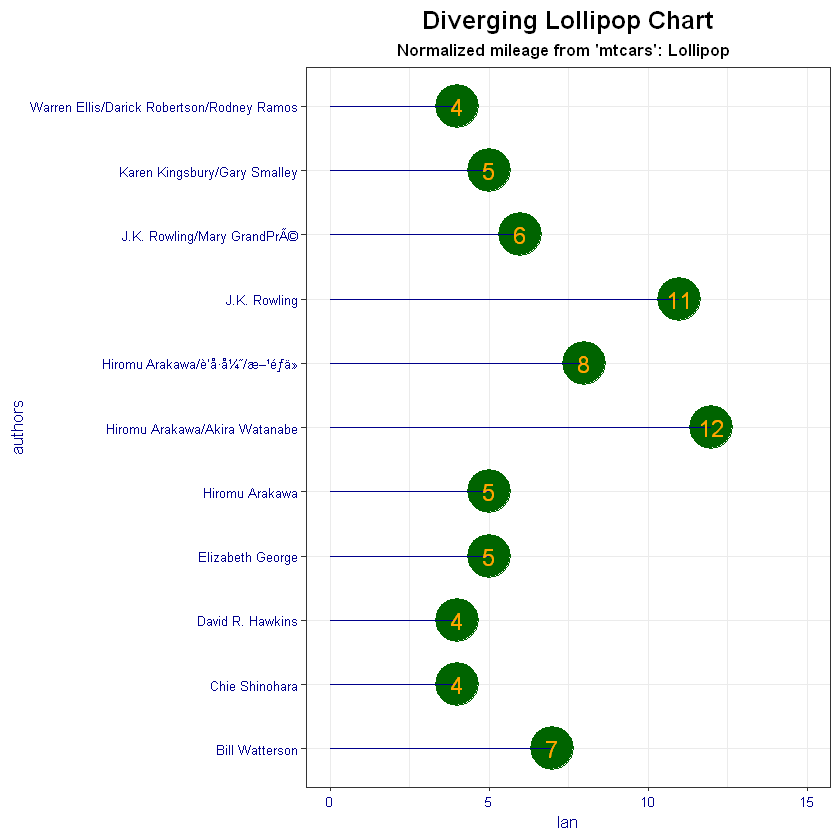

In [27]:
theme_set(theme_bw())

ggplot(d, aes(x=`authors`, y=lan, label=lan)) + 
  geom_point(stat='identity', color="dark green", size=12)  +
  geom_segment(aes(y = 0, 
                   x = `authors`, 
                   yend = lan, 
                   xend = `authors`), 
               color = "dark blue") +
  geom_text(color="orange", size=5) +
  labs(title="Diverging Lollipop Chart", 
       subtitle="Normalized mileage from 'mtcars': Lollipop") + 
  ylim(0,15) +
  coord_flip() +
  theme(axis.text=element_text(size=8, color = 'dark blue'), 
        plot.title = element_text(size = 15, face = "bold", hjust=0.5),
        axis.title=element_text(size=10, color = 'dark blue'),
        plot.subtitle = element_text(size = 10, face = "bold", hjust=0.48), 
        legend.title=element_text(size=10), 
        legend.text=element_text(size=8)
       )

In [277]:
m <- df %>%
group_by(language_code) %>%
summarize(avg=mean(average_rating), lan=n()) %>%
arrange(desc(avg)) %>%
#filter(language_code == 'en-US')
filter(lan>6,avg>2)

In [278]:
head(m)

language_code,avg,lan
zho,4.456429,14
jpn,4.268696,46
mul,4.133333,18
grc,4.097500,8
en-CA,4.025714,7
fre,3.970845,142


Warning message:
"Use of `m$language_code` is discouraged. Use `language_code` instead."Warning message:
"Use of `m$language_code` is discouraged. Use `language_code` instead."

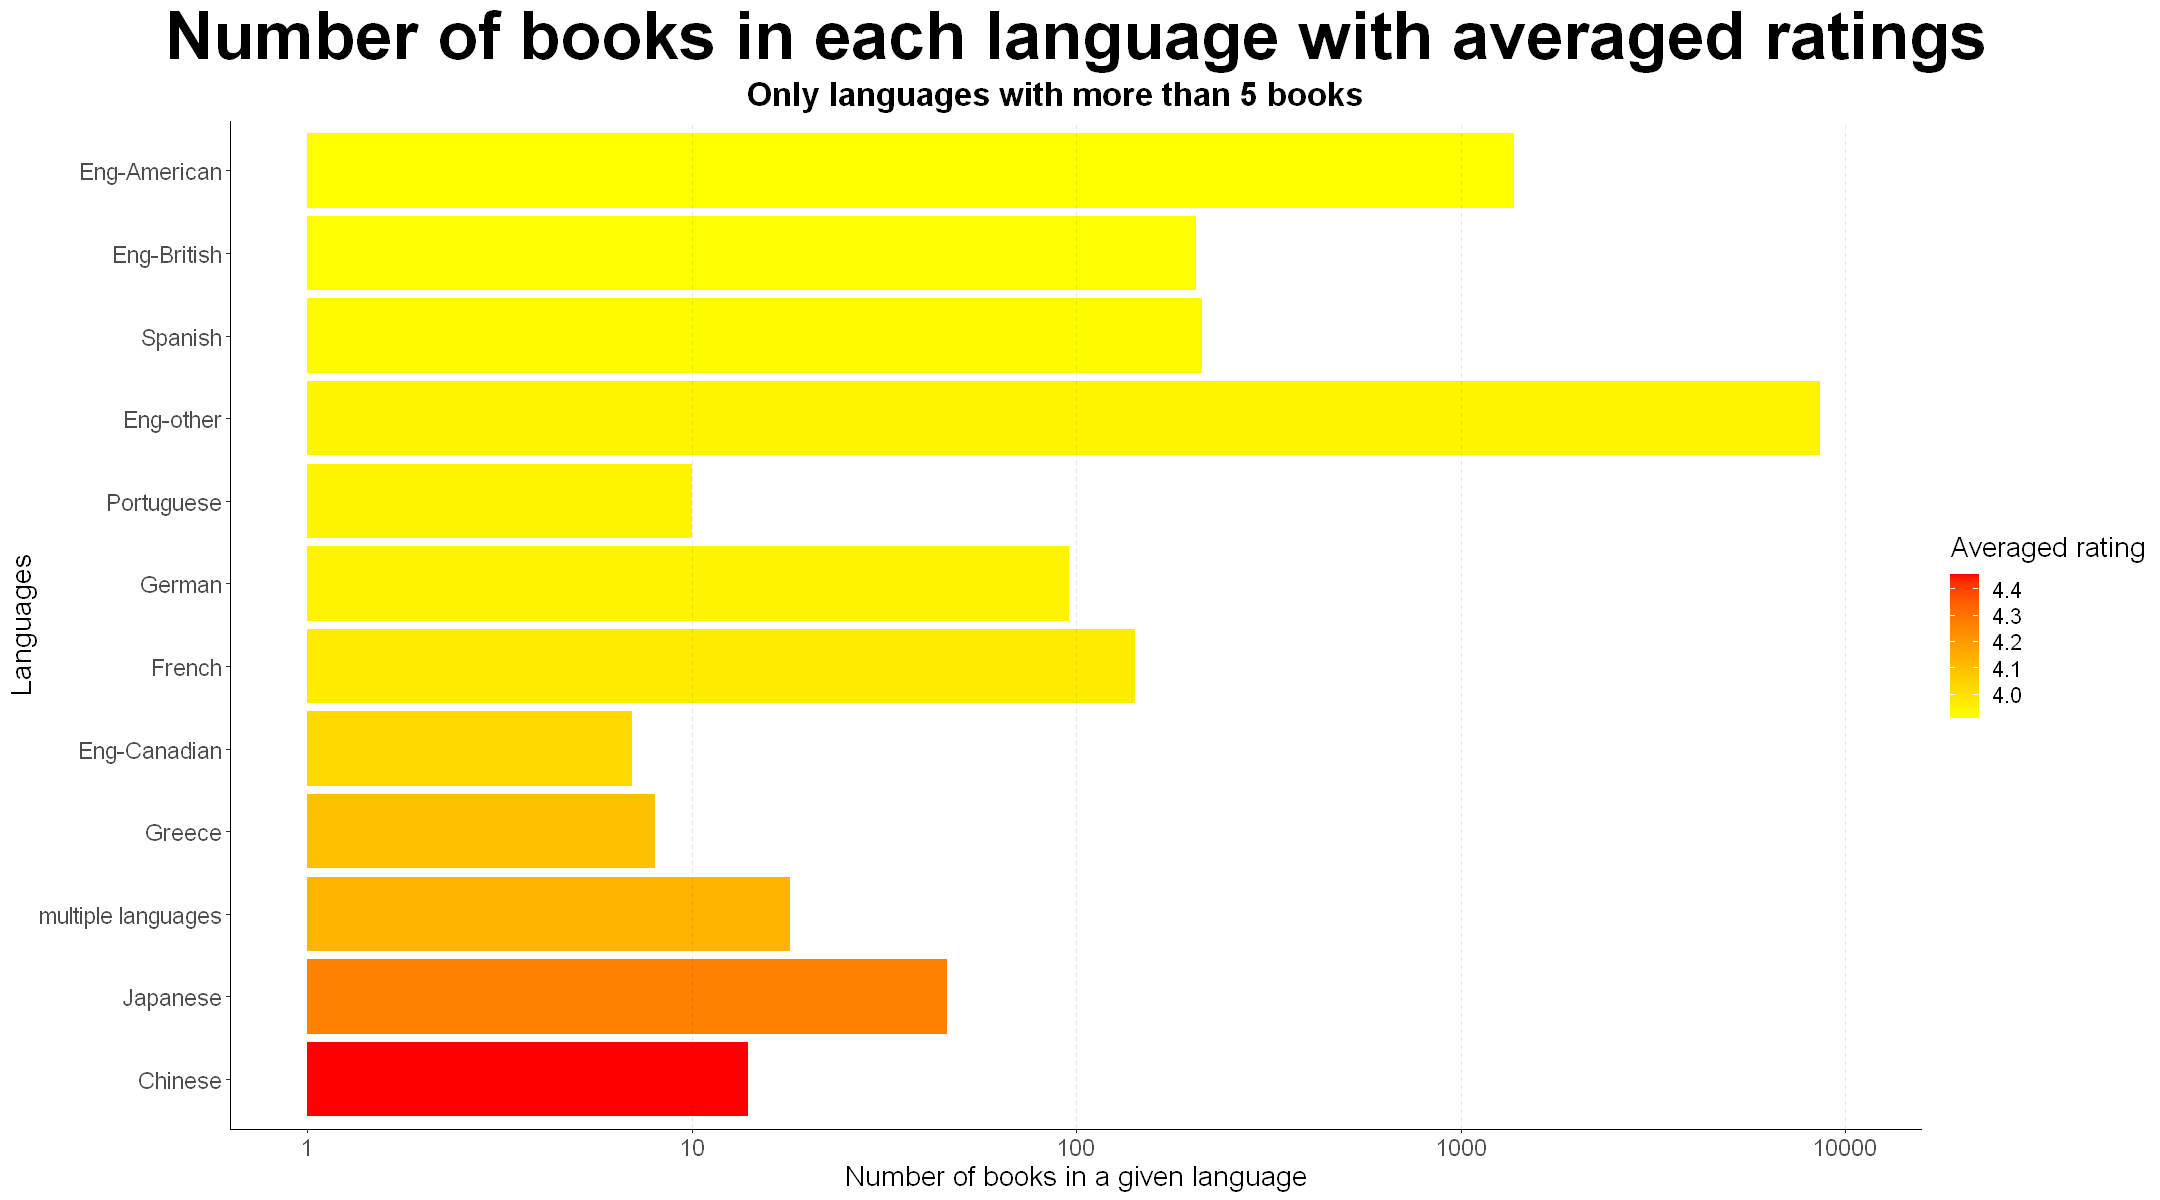

In [31]:

#m$language_code <- c(  'Chinese',  'Japanese','multiple languages', 'Greece','Eng-Canadian', 'French', 'German','Portuguese','Eng-other','Spanish','Eng-British', 'Eng-American')

options(repr.plot.width = 18 , repr.plot.height = 10)
ggplot(m)+
theme_classic()+
geom_bar(aes(x=factor(m$language_code, levels= as.character(m$language_code)),
             y=lan, fill=avg), stat='identity')+
geom_hline(yintercept=c(10, 100, 1000, 10000), linetype='dashed', alpha=0.1)+
coord_flip()+
scale_y_log10()+
scale_fill_gradient(low='yellow', high='Red')+
labs(y='Number of books in a given language', x='Languages', title='Number of books in each language with averaged ratings', 
     subtitle='Only languages with more than 5 books', fill='Averaged rating')+
theme(axis.text=element_text(size=14), plot.title = element_text(size = 40, face = "bold", hjust=0.5),axis.title=element_text(size=17),
        plot.subtitle = element_text(size = 20, face = "bold", hjust=0.48), legend.title=element_text(size=17), legend.text=element_text(size=13))

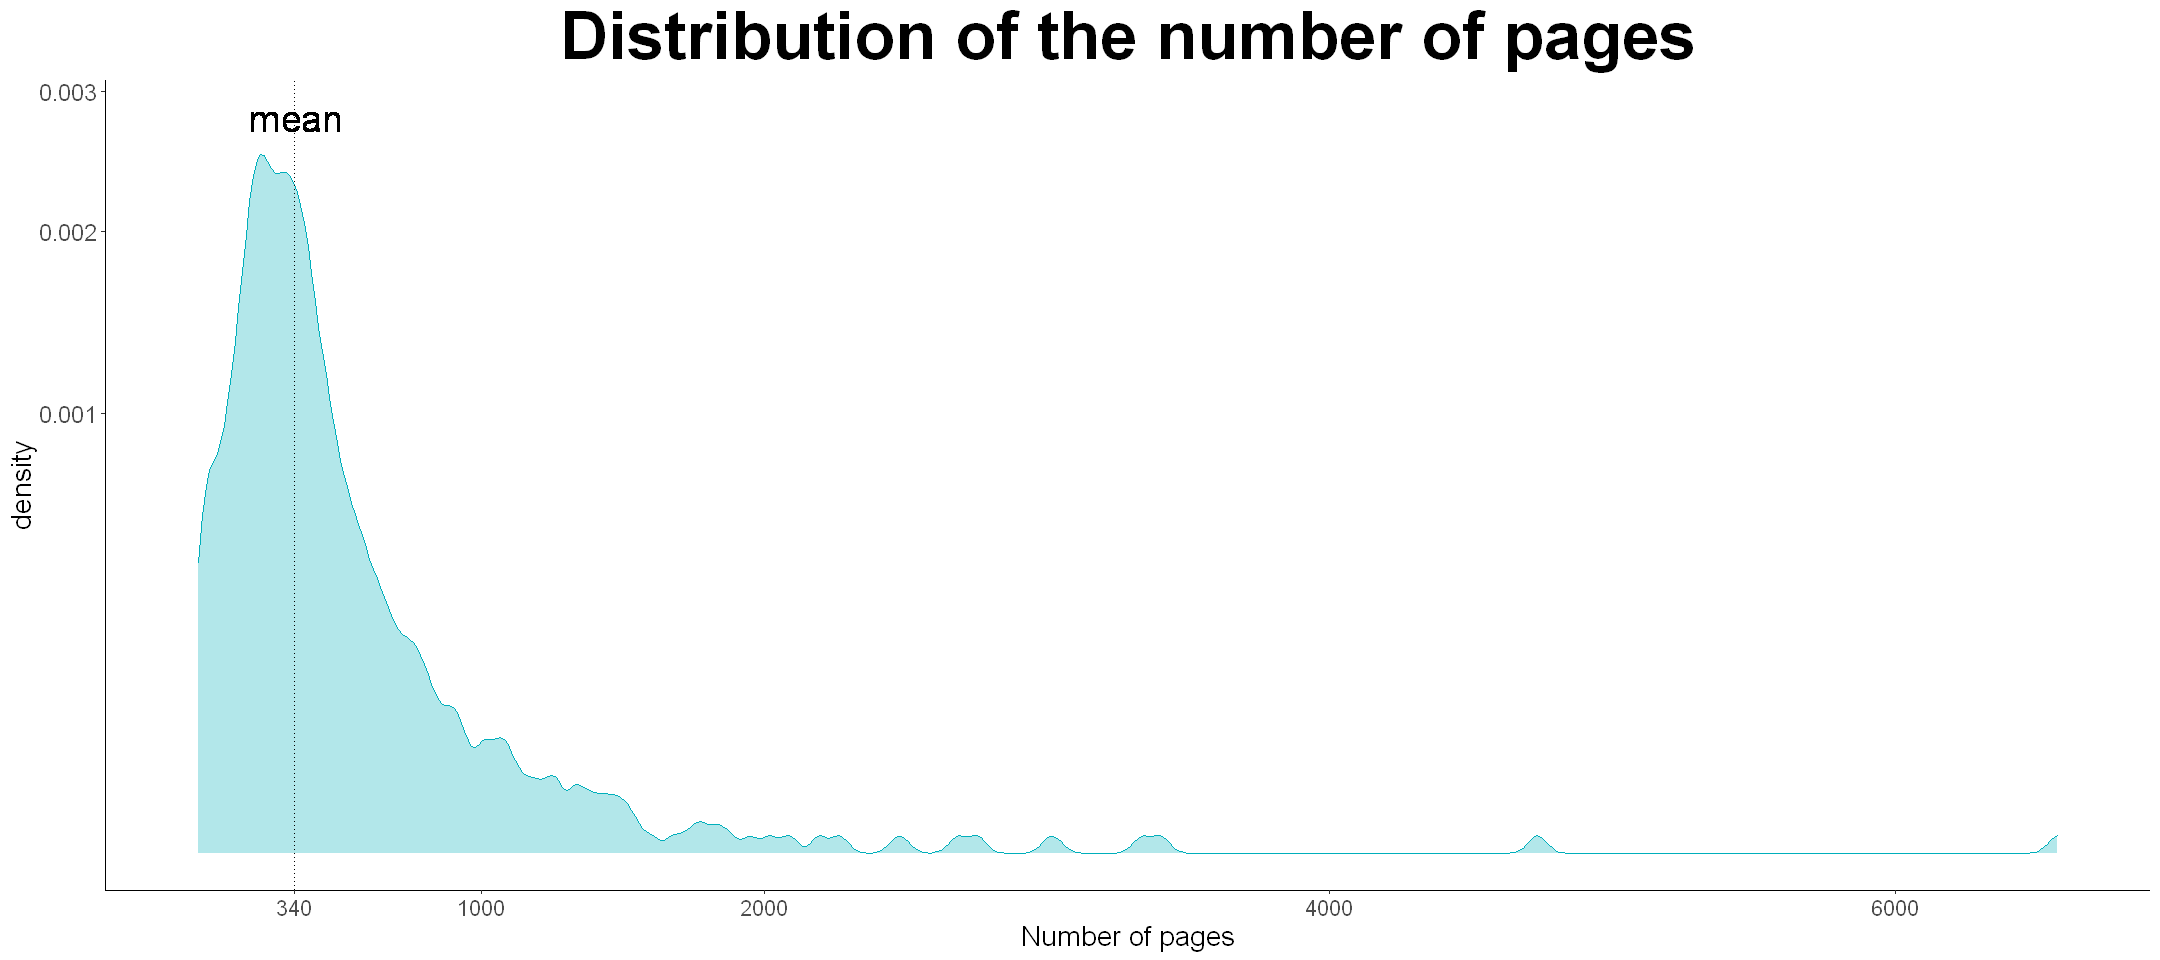

In [203]:
options(repr.plot.width = 18 , repr.plot.height = 8)
ggplot(df)+
  theme_classic()+
  geom_density(aes(Num_pages), fill='#00AFBB', col='#00AFBB', alpha=0.3)+
  labs(x='Number of pages',  title='Distribution of the number of pages')+
  theme(plot.title = element_text(hjust = 0.5, size=20),
        axis.text.x = element_text(size=13))+
  geom_vline(aes(xintercept=round(mean(Num_pages), 2)), linetype='dotted')+
  geom_text(aes(x=347, y=0.0028, label='mean'), size=8, nudge.y=10)+
  scale_y_sqrt()+
  scale_x_continuous(breaks=c(round(mean(df$Num_pages, )), 1000, 2000, 4000, 6000))+
  theme(axis.text=element_text(size=14), plot.title = element_text(size = 40, face = "bold", hjust=0.5),axis.title=element_text(size=17),
        plot.subtitle = element_text(size = 30, face = "bold", hjust=0.48))

In [52]:
m <- df %>%
  group_by(publisher) %>%
  summarize(avg=mean(average_rating), lan=n()) %>%
  arrange(desc(lan)) %>%
  #filter(language_code == 'en-US')
  filter(lan>15,avg>4.2)

In [53]:
head(m)

publisher,avg,lan
VIZ Media LLC,4.251176,85
Library of America,4.263462,52
Tyndale House Publishers,4.260000,22


Warning message:
"Use of `m$publisher` is discouraged. Use `publisher` instead."Warning message:
"Use of `m$publisher` is discouraged. Use `publisher` instead."

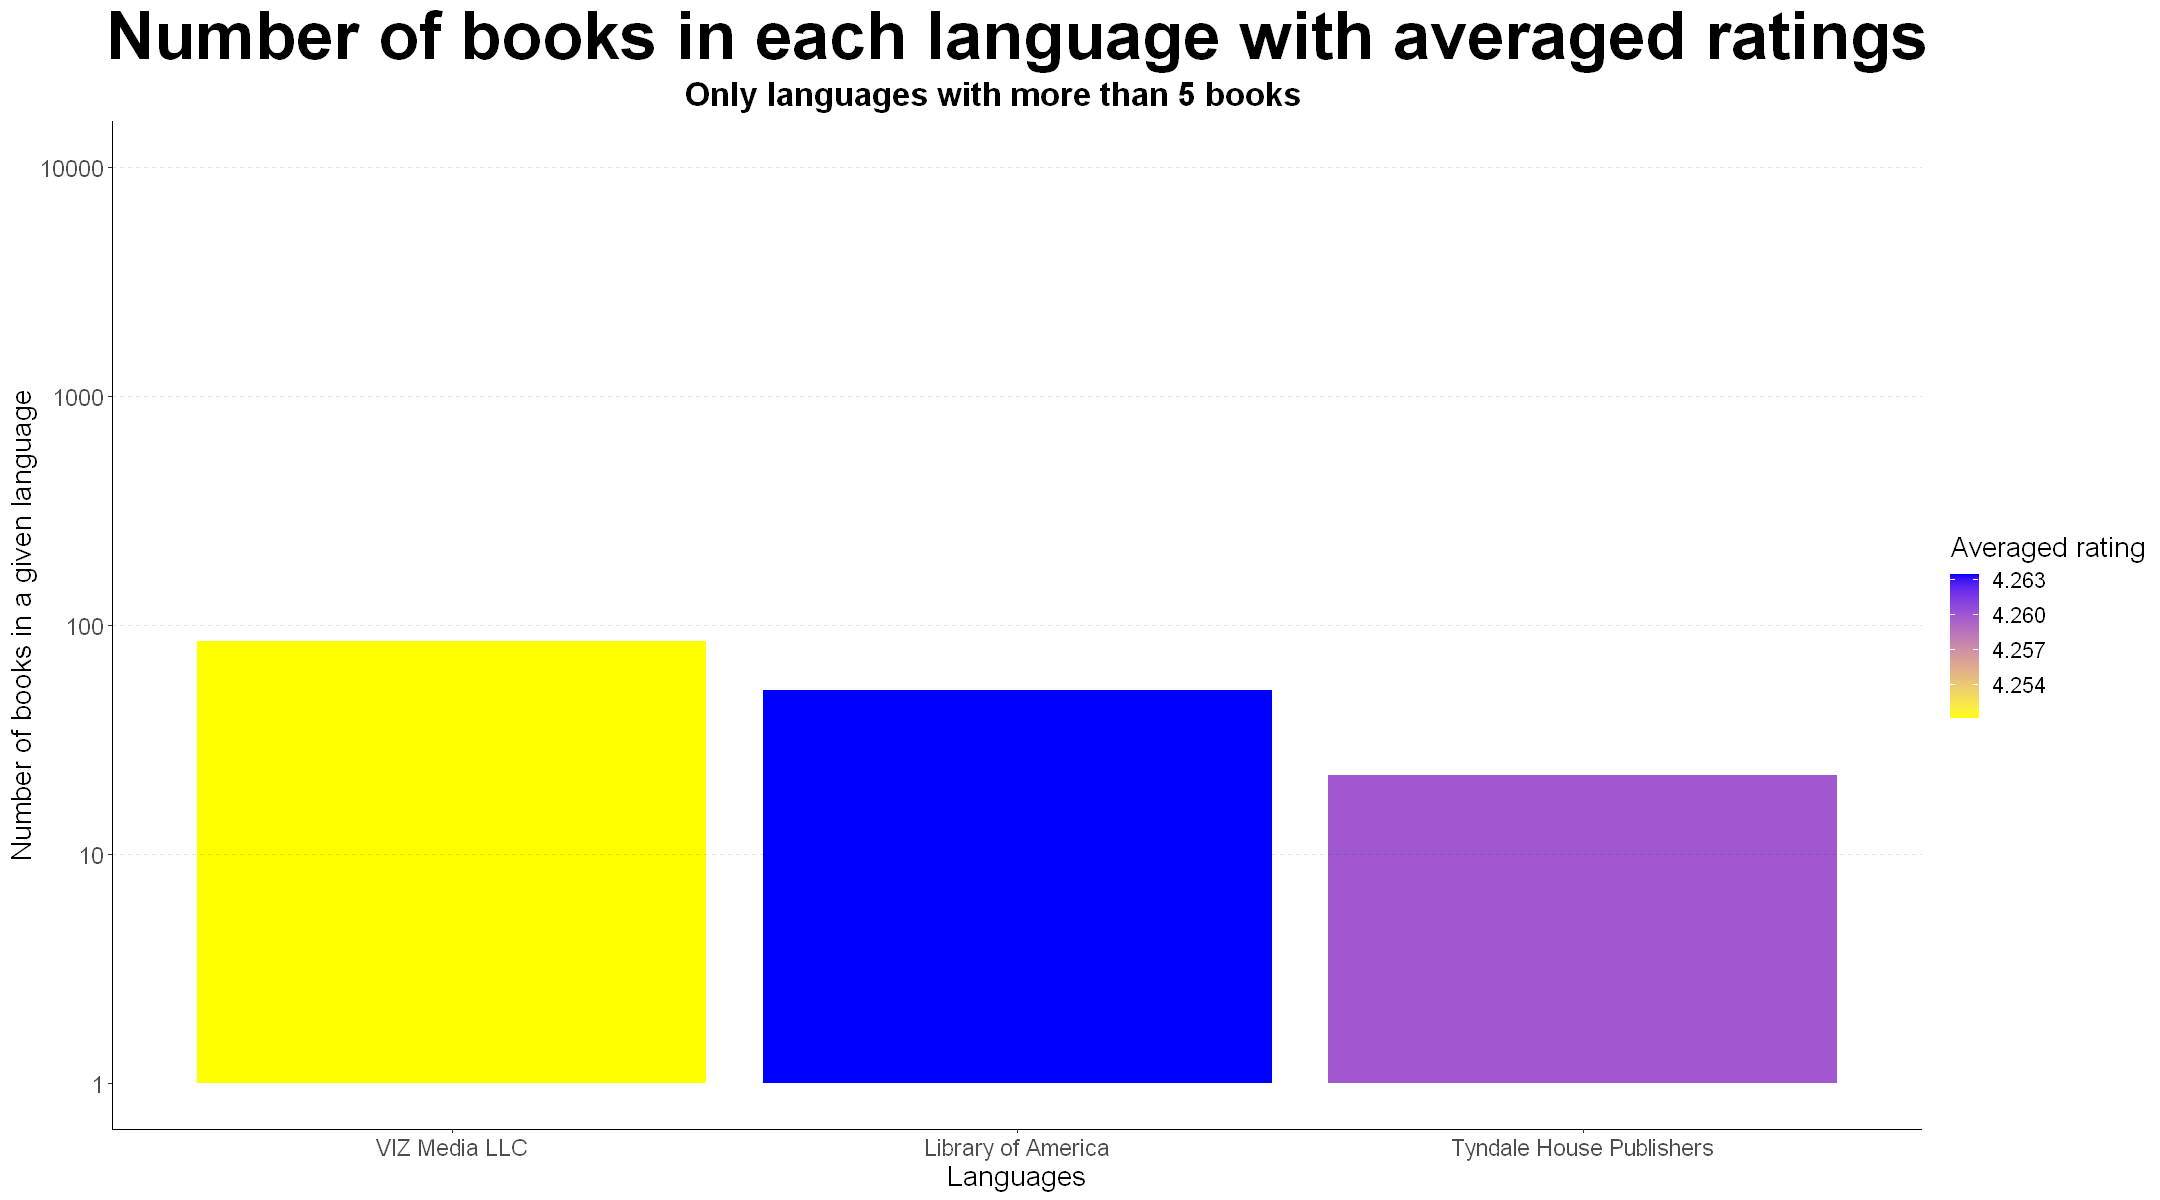

In [54]:
options(repr.plot.width = 18 , repr.plot.height = 10)
ggplot(m)+
theme_classic()+
geom_bar(aes(x=factor(m$publisher, levels= as.character(m$publisher)),
             y=lan, fill=avg), stat='identity')+
geom_hline(yintercept=c(10, 100, 1000, 10000), linetype='dashed', alpha=0.1)+
#coord_flip()+
scale_y_log10()+
scale_fill_gradient(low='yellow', high='Blue')+
labs(y='Number of books in a given language', x='Languages', title='Number of books in each language with averaged ratings', 
     subtitle='Only languages with more than 5 books', fill='Averaged rating')+
theme(axis.text=element_text(size=14), plot.title = element_text(size = 40, face = "bold", hjust=0.5),axis.title=element_text(size=17),
        plot.subtitle = element_text(size = 20, face = "bold", hjust=0.48), legend.title=element_text(size=17), legend.text=element_text(size=13))

In [ ]:
m <- df %>%
  group_by(publisher) %>%
  summarize(avg=mean(average_rating), lan=n()) %>%
  arrange(desc(lan)) %>%
  #filter(language_code == 'en-US')
  filter(lan>15,avg>4)

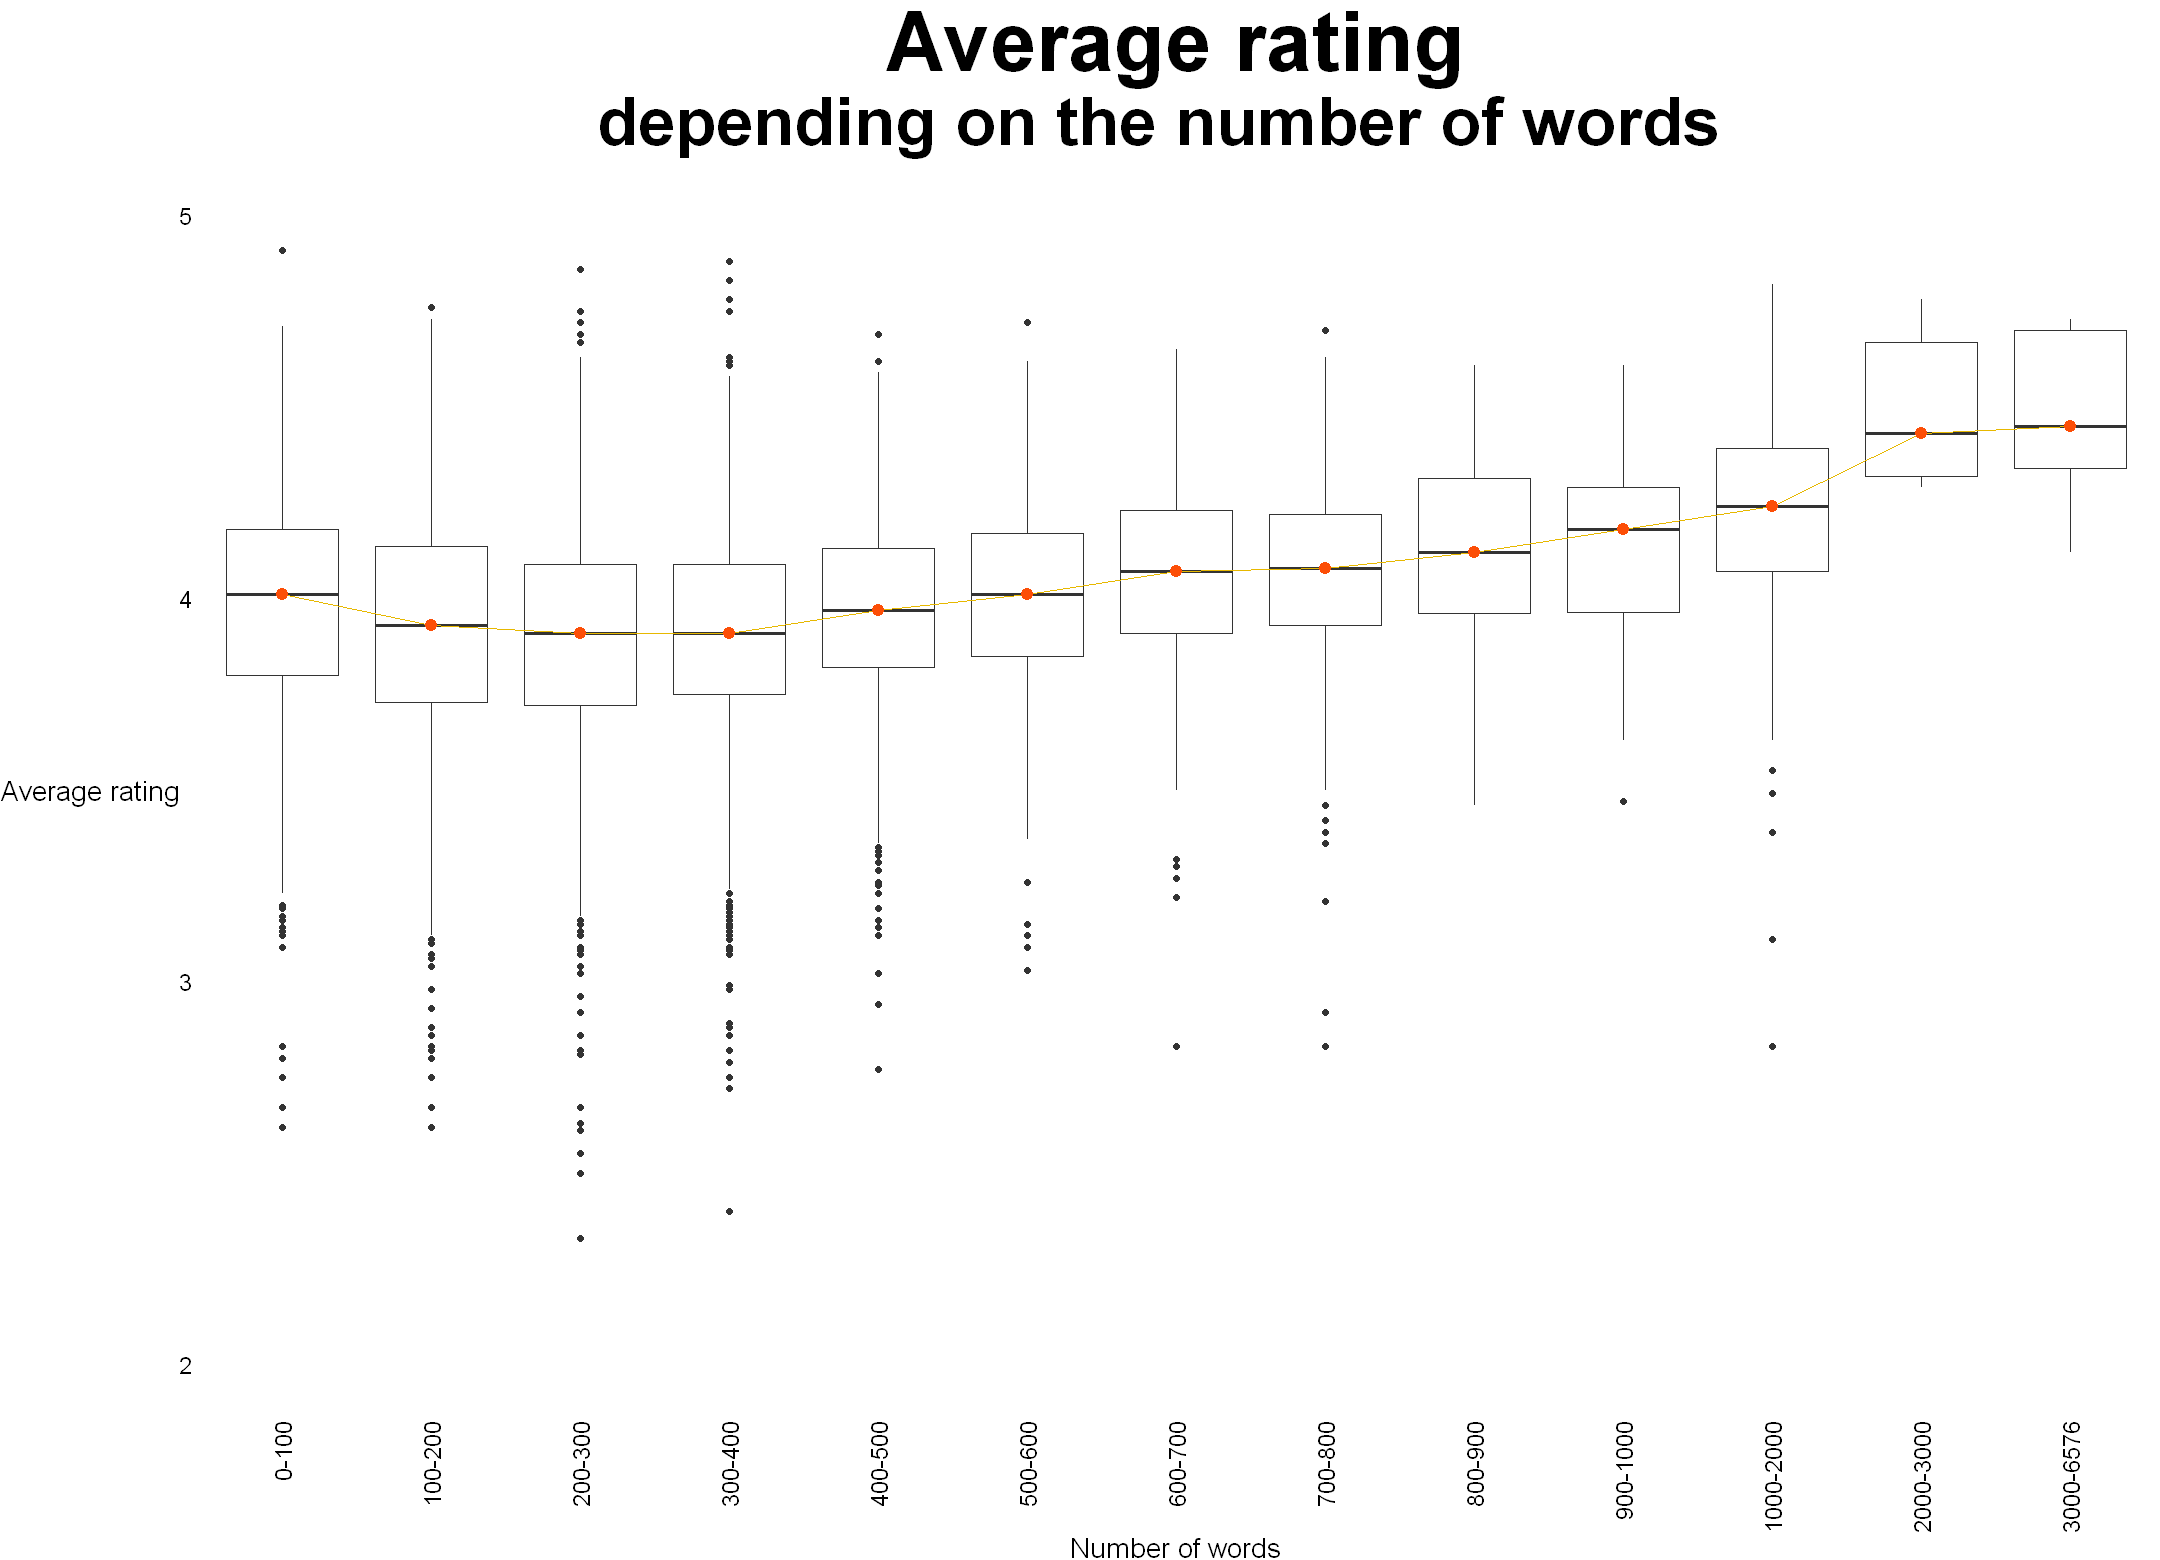

In [204]:
options(repr.plot.width = 18 , repr.plot.height = 13)
ggplot(df, aes(x=cut(df$Num_pages,
                         breaks=c(seq(0, 1000, by=100), 2000, 3000, 6600)),
                   average_rating))+
  theme_void()+
  geom_boxplot()+
  stat_summary(fun.y=median, geom="line", aes(group=1), colour="#E7B800", lw=5)  + 
  stat_summary(fun.y=median, geom="point", colour="#FC4E07", size=3)+
  coord_cartesian(ylim=c(2, 5))+
  labs(x='Number of words', y='Average rating', title='Average rating', 
       subtitle='depending on the number of words', fill='Averaged rating')+
  theme(plot.title = element_text(hjust = 0.5, size=20),
        plot.subtitle = element_text(hjust = 0.5, size=15),
        axis.text.x = element_text(angle = 90, hjust = 1))+
  scale_x_discrete(labels=c('0-100', '100-200', '200-300','300-400',
                            '400-500', '500-600', '600-700',
                            '700-800', '800-900', '900-1000',
                            '1000-2000', '2000-3000', '3000-6576'))+
  theme(axis.text=element_text(size=14), plot.title = element_text(size = 50, face = "bold", hjust=0.5),axis.title=element_text(size=17),
        plot.subtitle = element_text(size = 40, face = "bold", hjust=0.48))